In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
from IPython.display import display, HTML
import seaborn as sns

In [2]:
SHOW_FIGURES = True

In [3]:
if not SHOW_FIGURES:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

In [4]:
file_paths = ['./results/results.csv', #power2
              './results/results_power2_2.csv',
              './results/results_power1_1.csv',
              './results/results_master.csv',
             ]

In [5]:
csv_dict = []
def load_file(file_path, csv_dict):
    with open(file_path, 'r') as file:
        # Iterate over each line in the fileplt.plot(x_fit, y_fit, color='green', label='Polynomial Approximation')
        for line in file:
            # Split the line content by comma
            line_data = line.strip().split(',')
            if len(line_data) == 19:
                nineteen_keys = ['method', 'start time', 'end time', 'real execution time', 'system execution time',
                                 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness', 'weighted resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                row_dict = dict(zip(nineteen_keys, line_data))
                for k in ['optimal solution', 'feasible solution', 'no solution']:
                    if row_dict[k] == '':
                        row_dict[k] = 0
                csv_dict.append(row_dict)
            else:
                print(len(line_data))

df_dtypes = {'method' : str, 'start time' : str, 'end time' : str, 'real execution time' : float, 'system execution time' : float,
             'delta' : float, 'makespan' : float, 'result message' : str,
             'makespan' : float, 'resource occupation' : float, 'resource fairness' : float, 'weighted resource fairness' : float,
             'assigned tasks' : int, 'allocated tasks' : int, 'postponed tasks' : int,
             'optimal solution' : int, 'feasible solution' : int, 'no solution' : int,
             'resource worklist rule' : str}

for f in file_paths:
    load_file(f, csv_dict)

df = pd.DataFrame(csv_dict)
for k, v in df_dtypes.items():
    df[k] = df[k].astype(v)

In [6]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also
display(HTML(df.to_html()))

,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,resource occupation,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule
0,Hungarian,2024-06-04 14:27:09,2024-06-04 14:28:47,97.911439,97.556024,3.00,304.30068602989206,COMPLETED: you completed 8760 hours of simulated customer cases. 1665 cases started. 1618 cases run to completion.,313.153709,0.568812,0.036370,72.777543,24493,137650,960197,0,0,0,
1,Hungarian,2024-06-04 14:27:09,2024-06-04 14:28:51,102.218543,101.828483,2.00,294.6075301043925,COMPLETED: you completed 8760 hours of simulated customer cases. 1623 cases started. 1568 cases run to completion.,304.898118,0.506561,0.029609,62.106984,23855,119305,963134,0,0,0,
2,Hungarian,2024-06-04 14:27:09,2024-06-04 14:28:53,103.960128,103.615829,1.00,261.95086847272665,COMPLETED: you completed 8760 hours of simulated customer cases. 1729 cases started. 1696 cases run to completion.,267.008801,0.382409,0.033223,72.504527,26046,94806,949136,0,0,0,
3,Hungarian,2024-06-04 14:27:09,2024-06-04 14:28:54,104.975307,104.585726,4.00,317.9742257766829,COMPLETED: you completed 8760 hours of simulated customer cases. 1668 cases started. 1576 cases run to completion.,336.543650,0.565345,0.037367,75.522813,24188,137594,1031323,0,0,0,
4,Hungarian,2024-06-04 14:28:53,2024-06-04 14:30:37,103.744819,103.408926,7.00,412.41688150546224,COMPLETED: you completed 8760 hours of simulated customer cases. 1691 cases started. 1557 cases run to completion.,447.630864,0.595588,0.040124,77.258613,23751,142487,1332608,0,0,0,
5,Hungarian,2024-06-04 14:28:47,2024-06-04 14:30:40,112.469078,112.086870,5.00,524.6823138985543,COMPLETED: you completed 8760 hours of simulated customer cases. 1639 cases started. 1593 cases run to completion.,539.848447,0.590893,0.039557,79.018934,24428,146706,1942984,0,0,0,
6,Hungarian,2024-06-04 14:28:54,2024-06-04 14:30:40,105.891731,105.550524,8.00,403.0111880621359,COMPLETED: you completed 8760 hours of simulated customer cases. 1630 cases started. 1519 cases run to completion.,432.461672,0.582371,0.040486,79.870719,23244,137967,1202501,0,0,0,
7,Hungarian,2024-06-04 14:28:52,2024-06-04 14:30:44,112.372967,111.993979,6.00,518.9859832108045,COMPLETED: you completed 8760 hours of simulated customer cases. 1674 cases started. 1416 cases run to completion.,613.651989,0.562073,0.042751,87.116896,22468,132244,1793302,0,0,0,
8,Hungarian,2024-06-04 14:30:37,2024-06-04 14:32:20,102.941940,102.620427,9.00,498.24751052074726,COMPLETED: you completed 8760 hours of simulated customer cases. 1688 cases started. 1614 cases run to completion.,521.122469,0.611919,0.039758,76.211757,24392,151018,1709701,0,0,0,
9,Hungarian,2024-06-04 14:39:41,2024-06-04 14:41:08,86.710194,86.408173,1.20,136.03918660923867,COMPLETED: you completed 8760 hours of simulated customer cases. 1614 cases started. 1552 cases run to completion.,141.372120,0.361010,0.026970,55.889048,23634,90464,342782,0,0,0,


In [7]:
# When more than 10 delta values are present sample 10 random ones
result = df.groupby(['method']).apply(lambda x: x.sample(9)).reset_index(drop=True)
#result
df = result
print(len(df))

63


/tmp/ipykernel_39446/1047646439.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['method']).apply(lambda x: x.sample(9)).reset_index(drop=True)


<Figure size 640x480 with 0 Axes>

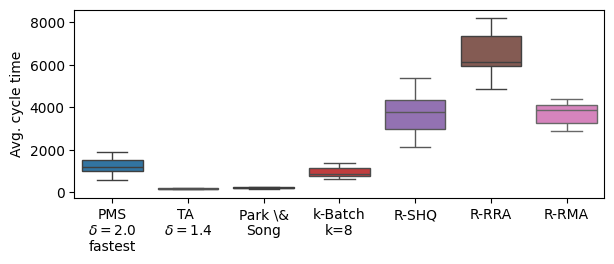

<Figure size 640x480 with 0 Axes>

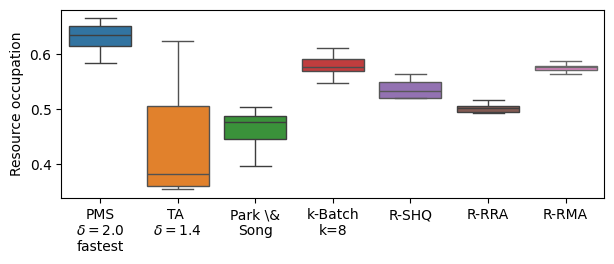

<Figure size 640x480 with 0 Axes>

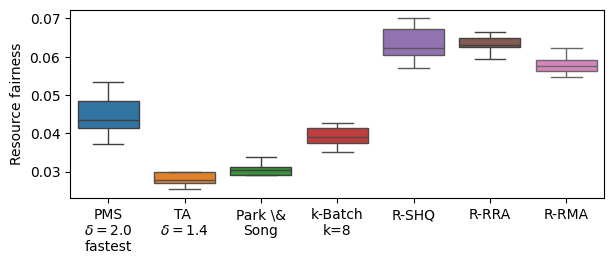

<Figure size 640x480 with 0 Axes>

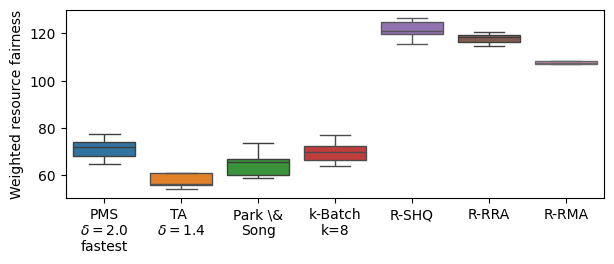

In [8]:

park_df = df[(df['method'] == 'Park')]
sq_df = df[(df['method'] == 'ShortestQueue')]
rr_df = df[(df['method'] == 'RoundRobin')]
ra_df = df[(df['method'] == 'Random')]
kb_df = df[(df['method'] == 'KBatch')]


our_upm_df = df[(df['method'] == 'MILP')]
our_ta_df = df[(df['method'] == 'Hungarian')]


def make_boxplot(y, label=None):
    fig = plt.gcf()
    
    fig,ax = plt.subplots(1)
    fig.set_size_inches(6, 2.5)

    sns.boxplot(y=y, x='method', data=our_upm_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=our_ta_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=park_df, ax=ax, showfliers=False)
    sns.boxplot(y=y, x='method', data=kb_df, ax=ax, showfliers=False)
    sns.boxplot(y=y, x='method', data=sq_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=rr_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=ra_df, ax=ax, showfliers=False) 

    ax.set(xlabel=None)
    ax.set_xticks([0,1,2,3,4,5,6], ['PMS\n$\delta=2.0$\nfastest', 'TA \n$\delta=1.4$', 'Park \&\nSong', 'k-Batch\nk=8', 'R-SHQ',
                               'R-RRA', 'R-RMA'])
    if label:
        ax.set(ylabel=label)
    else:
        ax.set(ylabel=y.capitalize())
    
    plt.tight_layout(pad=0.2)
    if SHOW_FIGURES:
        plt.show() 
    else:
        plt.savefig('boxplot_' + y + '.pgf')

make_boxplot('makespan', 'Avg. cycle time')
make_boxplot('resource occupation')
make_boxplot('resource fairness')
make_boxplot('weighted resource fairness')




<Figure size 640x480 with 0 Axes>

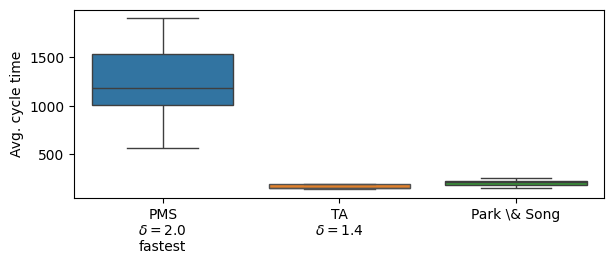

<Figure size 640x480 with 0 Axes>

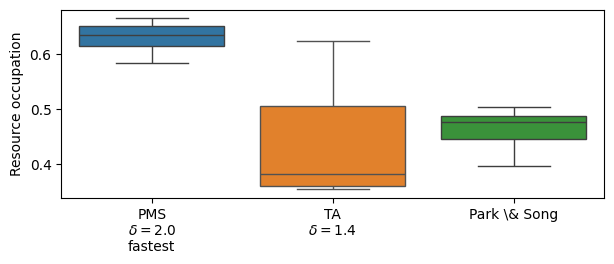

<Figure size 640x480 with 0 Axes>

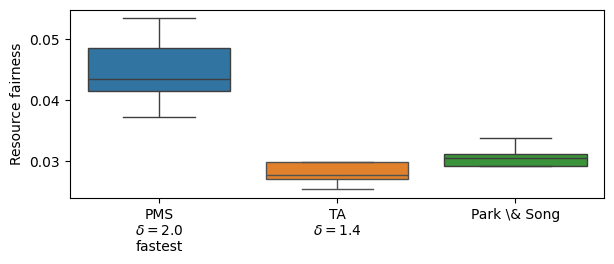

<Figure size 640x480 with 0 Axes>

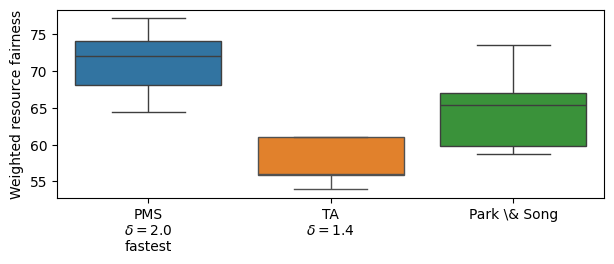

In [9]:
def make_boxplot(y, label=None):
    fig = plt.gcf()
    
    fig,ax = plt.subplots(1)
    fig.set_size_inches(6, 2.5)
    sns.boxplot(y=y, x='method', data=our_upm_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=our_ta_df, ax=ax, showfliers=False) 
    sns.boxplot(y=y, x='method', data=park_df, ax=ax, showfliers=False) 


    ax.set(xlabel=None)
    ax.set_xticks([0,1,2], ['PMS\n$\delta=2.0$\nfastest', 'TA\n$\delta=1.4$', 'Park \& Song'])
    if label:
        ax.set(ylabel=label)
    else:
        ax.set(ylabel=y.capitalize())
    
    plt.tight_layout(pad=0.2)
    if SHOW_FIGURES:
        plt.show() 
    else:
        plt.savefig('boxplot_3_' + y + '.pgf')

make_boxplot('makespan', 'Avg. cycle time')
make_boxplot('resource occupation')
make_boxplot('resource fairness')
make_boxplot('weighted resource fairness')

In [10]:
print(llqp_df)

NameError: name 'llqp_df' is not defined